In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)

In [271]:
df = pd.read_csv("by_file_length_data.csv")
df = df.rename(columns={"Unnamed: 0":"file"})
df.shape

(4157, 2)

In [272]:
df.head()

,file,word_count
0,'57 Chevrolet_Billie Jo Spears_1990,167
1,(Bloody Paw On The) Kill Floor_Busdriver_2007,456
2,(Coffee's For Closers)_Fall Out Boy_2008,339
3,(Do)Minion_Eluveitie_2010,179
4,(eskomolto)_Pagan Wanderer Lu_2015,125


In [273]:
years = [file.split("_")[-1] for file in df['file']]
year_length = [len(year) for year in years]
df['year_length'] = year_length

In [274]:
df_wordcount = df[df.year_length == 4]

In [275]:
df_wordcount.head()

,file,word_count,year_length
0,'57 Chevrolet_Billie Jo Spears_1990,167,4
1,(Bloody Paw On The) Kill Floor_Busdriver_2007,456,4
2,(Coffee's For Closers)_Fall Out Boy_2008,339,4
3,(Do)Minion_Eluveitie_2010,179,4
4,(eskomolto)_Pagan Wanderer Lu_2015,125,4


In [276]:
years = [int(file.split("_")[-1]) for file in df_wordcount['file']]

In [277]:
decades = [year//10*10 for year in years]

In [278]:
df_wordcount['decade'] = decades
df_wordcount = df_wordcount.drop('year_length', axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [279]:
df_wordcount.head()

,file,word_count,decade
0,'57 Chevrolet_Billie Jo Spears_1990,167,1990
1,(Bloody Paw On The) Kill Floor_Busdriver_2007,456,2000
2,(Coffee's For Closers)_Fall Out Boy_2008,339,2000
3,(Do)Minion_Eluveitie_2010,179,2010
4,(eskomolto)_Pagan Wanderer Lu_2015,125,2010


In [280]:
df_wordcount.shape

(4095, 3)

In [281]:
df_sentiment = pd.read_csv("by_file_sentiment_data.csv")
df_sentiment = df_sentiment.rename(columns={"Unnamed: 0":"file"})

In [282]:
df_sentiment.head()

,file,polarity,subjectivity
0,'57 Chevrolet_Billie Jo Spears_1990,0.303333,0.457000
1,(Bloody Paw On The) Kill Floor_Busdriver_2007,-0.022491,0.579749
2,(Coffee's For Closers)_Fall Out Boy_2008,-0.144086,0.352151
3,(Do)Minion_Eluveitie_2010,0.256667,0.720000
4,(eskomolto)_Pagan Wanderer Lu_2015,-0.150185,0.447963


In [283]:
df_sentiment = df_sentiment[df_sentiment['file'].isin(df_wordcount['file'])]

In [284]:
df_sentiment.shape

(4095, 3)

In [285]:
df_sentiment['word_count'] = df_wordcount['word_count']
df_sentiment['decade'] = decades

In [286]:
df_sentiment = df_sentiment.set_index('file')

In [151]:
df_sentiment.to_csv('lyric_data.csv')

In [117]:
df_tfidf = pd.read_csv("tf_idf.csv")
df_tfidf = df_tfidf.rename(columns={"Unnamed: 0":"file"})

In [119]:
df_tfidf.shape

(410, 11079)

In [59]:
df_lyricdata = pd.read_csv('lyric_data.csv', index_col=0)

In [60]:
df_lyricdata.head()

,polarity,subjectivity,word_count,decade
file,,,,
'57 Chevrolet_Billie Jo Spears_1990,0.303333,0.457000,167,1990
(Bloody Paw On The) Kill Floor_Busdriver_2007,-0.022491,0.579749,456,2000
(Coffee's For Closers)_Fall Out Boy_2008,-0.144086,0.352151,339,2000
(Do)Minion_Eluveitie_2010,0.256667,0.720000,179,2010
(eskomolto)_Pagan Wanderer Lu_2015,-0.150185,0.447963,125,2010


2000    2023
1990    1079
1980     440
1970     231
2010     146
1960     127
1950      29
1920      10
1940       7
1930       3
Name: decade, dtype: int64


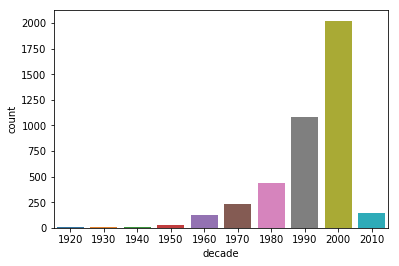

In [61]:
print(df_lyricdata['decade'].value_counts())
ax = sns.countplot(df_lyricdata['decade'])

In [8]:
df_lyricdata = df_lyricdata[df_lyricdata.decade != 1930]

In [62]:
decade_labels = {
  1920: 0,
  1930: 1,
  1940: 2,
  1950: 3,
  1960: 4,
  1970: 5,
  1980: 6,
  1990: 7,
  2000: 8,
  2010: 9
}

In [63]:
labels = [decade_labels[x] for x in df_lyricdata['decade']]

In [64]:
df_lyricdata['label'] = labels

In [293]:
df_lyricdata.to_csv('lyric_data_labeled.csv')

In [65]:
np.unique(df_lyricdata['label'].values)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
df_lyricdata = df_lyricdata.drop('decade', axis=1)
df_lyricdata.head()

,polarity,subjectivity,word_count,label
file,,,,
'57 Chevrolet_Billie Jo Spears_1990,0.303333,0.457000,167,7
(Bloody Paw On The) Kill Floor_Busdriver_2007,-0.022491,0.579749,456,8
(Coffee's For Closers)_Fall Out Boy_2008,-0.144086,0.352151,339,8
(Do)Minion_Eluveitie_2010,0.256667,0.720000,179,9
(eskomolto)_Pagan Wanderer Lu_2015,-0.150185,0.447963,125,9


In [67]:
df_lyricdata.shape

(4095, 4)

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_lyricdata.loc[:,:'word_count'], df_lyricdata['label'],
                                                    test_size=0.10, random_state=42)

In [259]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [89]:
model_01 = XGBClassifier(objective="multi:softmax", random_state=42)
model_01.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [90]:
y_pred = model_01.predict(X_test)

In [91]:
y_pred

array([8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [92]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        47
           7       0.46      0.06      0.10       106
           8       0.50      0.98      0.66       203
           9       0.00      0.00      0.00        15

   micro avg       0.50      0.50      0.50       410
   macro avg       0.12      0.13      0.10       410
weighted avg       0.37      0.50      0.35       410



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
print(metrics.accuracy_score(y_pred, y_test))

0.4975609756097561


In [82]:
xgb1 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=100, 
    max_depth=5,
    min_child_weight=1, 
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    num_class=10
    )
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, num_class=10, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.8)

In [83]:
y_pred_01 = xgb1.predict(X_test)

In [84]:
y_pred_01

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [267]:
print(metrics.classification_report(y_test, y_pred_01))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        44
           5       0.00      0.00      0.00        83
           6       0.29      0.06      0.10       228
           7       0.48      0.94      0.63       389
           8       0.00      0.00      0.00        28

   micro avg       0.47      0.47      0.47       819
   macro avg       0.08      0.11      0.08       819
weighted avg       0.31      0.47      0.33       819



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
print(metrics.accuracy_score(y_pred_01, y_test))

0.4975609756097561


In [ ]:
xgb_params_01 = {
    'max_depth':range(3,10),
    'min_child_weight':range(1,6)
}
estimator_01 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    num_class=10
    )
xgb_model_01 = GridSearchCV(estimator=estimator_01, 
                            param_grid=xgb_params_01, 
                            n_jobs=4, 
                            iid=False,
                            cv=5)
xgb_model_01.fit(X_train, y_train)

In [44]:
print("Best params: ", xgb_model_01.best_params_)
print("Best score: ", xgb_model_01.best_score_)

Best params:  {'max_depth': 3, 'min_child_weight': 4}
Best score:  0.49185323785721574


In [45]:
model_01_y_pred = xgb_model_01.predict(X_test)
model_01_y_pred

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8,
       7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8,
       7, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [46]:
xgb_params_02 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
estimator_02 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=1000,
    max_depth=3,
    min_child_weight=4,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    num_class=10
    )
xgb_model_02 = GridSearchCV(estimator=estimator_02, 
                            param_grid=xgb_params_02, 
                            scoring='accuracy', 
                            n_jobs=4, 
                            iid=False,
                            cv=5)
xgb_model_02.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, num_class=10, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
print("Best params: ", xgb_model_02.best_params_)
print("Best score: ", xgb_model_02.best_score_)

Best params:  {'gamma': 0.2}
Best score:  0.49212460827783994


In [48]:
xgb_params_03 = {
    'subsample':[0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree':[0.6, 0.7, 0.8, 0.9, 1.0]
}
estimator_03 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=1000,
    max_depth=3,
    min_child_weight=4,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    num_class=10
    )
xgb_model_03 = GridSearchCV(estimator=estimator_03, 
                            param_grid=xgb_params_03, 
                            scoring='accuracy', 
                            n_jobs=4, 
                            iid=False,
                            cv=5)
xgb_model_03.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, num_class=10,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
print("Best params: ", xgb_model_03.best_params_)
print("Best score: ", xgb_model_03.best_score_)

Best params:  {'colsample_bytree': 1.0, 'subsample': 1.0}
Best score:  0.49565354795128985


In [51]:
xgb_params_04 = {
    'subsample':[i/100.0 for i in range(90, 100, 5)],
    'colsample_bytree':[i/100.0 for i in range(90, 100, 5)]
}
estimator_04 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=1000,
    max_depth=3,
    min_child_weight=4,
    gamma=0.2,
    subsample=1.0,
    colsample_bytree=1.0,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    num_class=10
    )
xgb_model_04 = GridSearchCV(estimator=estimator_04, 
                            param_grid=xgb_params_04, 
                            scoring='accuracy', 
                            n_jobs=4, 
                            iid=False,
                            cv=5)
xgb_model_04.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.2, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, num_class=10,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1.0),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.9, 0.95], 'colsample_bytree': [0.9, 0.95]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
print("Best params: ", xgb_model_04.best_params_)
print("Best score: ", xgb_model_04.best_score_)

Best params:  {'colsample_bytree': 0.9, 'subsample': 0.95}
Best score:  0.4923896883911514


In [53]:
xgb_params_05 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
estimator_05 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=1000,
    max_depth=3,
    min_child_weight=4,
    gamma=0.2,
    subsample=0.95,
    colsample_bytree=0.9,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    num_class=10
    )
xgb_model_05 = GridSearchCV(estimator=estimator_05, 
                            param_grid=xgb_params_05, 
                            scoring='accuracy', 
                            n_jobs=4, 
                            iid=False,
                            cv=5)
xgb_model_05.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.2, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, num_class=10,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.95),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [54]:
print("Best params: ", xgb_model_05.best_params_)
print("Best score: ", xgb_model_05.best_score_)

Best params:  {'reg_alpha': 100}
Best score:  0.49946205000460486


In [238]:
xgb_params_06 = {
 'n_estimators':[100, 400, 500, 700, 1000]
}
estimator_06 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=100,
    max_depth=3,
    min_child_weight=4,
    gamma=0.1,
    subsample=0.55,
    colsample_bytree=0.7,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    reg_alpha=100,
    num_class=10
    )
xgb_model_06 = GridSearchCV(estimator=estimator_06, 
                            param_grid=xgb_params_06, 
                            scoring='accuracy', 
                            n_jobs=4, 
                            iid=False,
                            cv=5)
xgb_model_06.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=10,
       objective='multi:softmax', random_state=0, reg_alpha=100,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.55),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [100, 400, 500, 700, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [239]:
print("Best params: ", xgb_model_06.best_params_)
print("Best score: ", xgb_model_06.best_score_)

Best params:  {'n_estimators': 100}
Best score:  0.4950865009542304


In [240]:
xgb2 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=100,
    max_depth=3,
    min_child_weight=4,
    gamma=0.1,
    subsample=0.55,
    colsample_bytree=0.7,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    reg_alpha=100,
    num_class=10
    )
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=10,
       objective='multi:softprob', random_state=0, reg_alpha=100,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.55)

In [241]:
y_pred_02 = xgb2.predict(X_test)
print(metrics.classification_report(y_test, y_pred_02))
print(metrics.accuracy_score(y_pred_02, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       142
           7       0.00      0.00      0.00       374
           8       0.49      1.00      0.66       665
           9       0.00      0.00      0.00        49

   micro avg       0.49      0.49      0.49      1352
   macro avg       0.05      0.10      0.07      1352
weighted avg       0.24      0.49      0.32      1352

0.4918639053254438


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [270]:
from sklearn.externals import joblib 
joblib.dump(xgb2, 'xgb2_model.pkl') 

['xgb2_model.pkl']

In [17]:
from sklearn.externals import joblib 

xgb_model = joblib.load('xgb2_model.pkl')
y_pred_proba = xgb_model.predict_proba(X_test)

In [18]:
y_pred = xgb_model.predict(X_test)

In [19]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        44
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00       228
           8       0.47      1.00      0.64       389
           9       0.00      0.00      0.00        28

   micro avg       0.47      0.47      0.47       819
   macro avg       0.05      0.11      0.07       819
weighted avg       0.23      0.47      0.31       819

0.47496947496947495


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
len(y_pred)

819

In [22]:
X = df_lyricdata.loc[:,:'word_count']

In [32]:
y_pred_proba_full = xgb_model.predict_proba(X)

In [33]:
y_pred_proba_full

array([[0.07632929, 0.07540856, 0.07595454, ..., 0.12518588, 0.22818057,
        0.08524425],
       [0.07632929, 0.07540856, 0.07595454, ..., 0.12518588, 0.22818057,
        0.08524425],
       [0.07632929, 0.07540856, 0.07595454, ..., 0.12518588, 0.22818057,
        0.08524425],
       ...,
       [0.07632929, 0.07540856, 0.07595454, ..., 0.12518588, 0.22818057,
        0.08524425],
       [0.07632929, 0.07540856, 0.07595454, ..., 0.12518588, 0.22818057,
        0.08524425],
       [0.07632929, 0.07540856, 0.07595454, ..., 0.12518588, 0.22818057,
        0.08524425]], dtype=float32)

In [29]:
print(metrics.classification_report(df_lyricdata.loc[:,'label'], y_pred_full))
print(metrics.accuracy_score(y_pred_full, df_lyricdata.loc[:,'label']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00       127
           5       0.00      0.00      0.00       231
           6       0.00      0.00      0.00       440
           7       0.00      0.00      0.00      1079
           8       0.49      1.00      0.66      2023
           9       0.00      0.00      0.00       146

   micro avg       0.49      0.49      0.49      4092
   macro avg       0.05      0.11      0.07      4092
weighted avg       0.24      0.49      0.33      4092

0.49437927663734116


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
xgb3 = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=100,
    max_depth=3,
    min_child_weight=4,
    gamma=0.1,
    subsample=0.55,
    colsample_bytree=0.7,
    objective="multi:softmax",
    nthread=4,
    scale_pos_weight=1,
    seed=42,
    reg_alpha=100,
    num_class=10
    )
xgb3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=10,
       objective='multi:softprob', random_state=0, reg_alpha=100,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.55)

In [87]:
y_pred_final = xgb3.predict(X_test)

print(metrics.classification_report(y_test, y_pred_final))
print(metrics.accuracy_score(y_pred_final, y_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00       106
           8       0.50      1.00      0.66       203
           9       0.00      0.00      0.00        15

   micro avg       0.50      0.50      0.50       410
   macro avg       0.06      0.12      0.08       410
weighted avg       0.25      0.50      0.33       410

0.4951219512195122


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
y_pred_final

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [94]:
X = df_lyricdata.loc[:,:'word_count']
y_pred_final = model_01.predict(X)

In [98]:
y_pred_final_proba = model_01.predict_proba(X)


In [115]:
df_lyricdata.head()

,polarity,subjectivity,word_count,label
file,,,,
'57 Chevrolet_Billie Jo Spears_1990,0.303333,0.457000,167,7
(Bloody Paw On The) Kill Floor_Busdriver_2007,-0.022491,0.579749,456,8
(Coffee's For Closers)_Fall Out Boy_2008,-0.144086,0.352151,339,8
(Do)Minion_Eluveitie_2010,0.256667,0.720000,179,9
(eskomolto)_Pagan Wanderer Lu_2015,-0.150185,0.447963,125,9


In [104]:
prob_dataset = pd.DataFrame({'1920':y_pred_final_proba[:,0],'1930':y_pred_final_proba[:,1],'1940':y_pred_final_proba[:,2],'1950':y_pred_final_proba[:,3],'1960':y_pred_final_proba[:,4],'1970':y_pred_final_proba[:,5],'1980':y_pred_final_proba[:,6],'1990':y_pred_final_proba[:,7], '2000':y_pred_final_proba[:,8],'2010':y_pred_final_proba[:,9]})

In [106]:
prob_dataset['1910'] = 0.0

In [107]:
prob_dataset

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,1910
0,0.008635,0.000819,0.001462,0.008612,0.051100,0.047812,0.095981,0.301132,0.444470,0.039977,0.0
1,0.001535,0.000660,0.001428,0.002132,0.006503,0.018752,0.032217,0.283940,0.635774,0.017058,0.0
2,0.002075,0.002966,0.004556,0.001618,0.015573,0.016749,0.125878,0.280444,0.528608,0.021531,0.0
3,0.002615,0.000855,0.002158,0.007622,0.016199,0.080366,0.066187,0.321897,0.461403,0.040699,0.0
4,0.002730,0.011084,0.002320,0.003902,0.046263,0.057758,0.110789,0.258941,0.318596,0.187616,0.0
5,0.001453,0.002304,0.002391,0.007920,0.054179,0.094883,0.128573,0.265419,0.418246,0.024632,0.0
6,0.005447,0.001243,0.000897,0.001889,0.016350,0.045916,0.113323,0.246594,0.526213,0.042128,0.0
7,0.001845,0.000791,0.001708,0.008224,0.036709,0.105862,0.115603,0.260186,0.426692,0.042381,0.0
8,0.001295,0.000787,0.001795,0.009587,0.005275,0.044921,0.089258,0.252488,0.563729,0.030865,0.0
9,0.008575,0.007382,0.001452,0.010616,0.134760,0.049515,0.214406,0.207306,0.267529,0.098458,0.0


In [108]:
cols = prob_dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [109]:
cols

['1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '2000',
 '2010']

In [110]:
cols = prob_dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
prob_dataset = prob_dataset[cols]

In [111]:
prob_dataset

,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,0.0,0.008635,0.000819,0.001462,0.008612,0.051100,0.047812,0.095981,0.301132,0.444470,0.039977
1,0.0,0.001535,0.000660,0.001428,0.002132,0.006503,0.018752,0.032217,0.283940,0.635774,0.017058
2,0.0,0.002075,0.002966,0.004556,0.001618,0.015573,0.016749,0.125878,0.280444,0.528608,0.021531
3,0.0,0.002615,0.000855,0.002158,0.007622,0.016199,0.080366,0.066187,0.321897,0.461403,0.040699
4,0.0,0.002730,0.011084,0.002320,0.003902,0.046263,0.057758,0.110789,0.258941,0.318596,0.187616
5,0.0,0.001453,0.002304,0.002391,0.007920,0.054179,0.094883,0.128573,0.265419,0.418246,0.024632
6,0.0,0.005447,0.001243,0.000897,0.001889,0.016350,0.045916,0.113323,0.246594,0.526213,0.042128
7,0.0,0.001845,0.000791,0.001708,0.008224,0.036709,0.105862,0.115603,0.260186,0.426692,0.042381
8,0.0,0.001295,0.000787,0.001795,0.009587,0.005275,0.044921,0.089258,0.252488,0.563729,0.030865
9,0.0,0.008575,0.007382,0.001452,0.010616,0.134760,0.049515,0.214406,0.207306,0.267529,0.098458


In [112]:
prob_dataset.rename(columns={'1910': 0, '1920': 1, '1930': 2, '1940': 3,'1950': 4, '1960': 5,'1970': 6, '1980': 7,'1990': 8, '2000': 9,'2010': 10}, inplace=True)


In [113]:
prob_dataset

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.008635,0.000819,0.001462,0.008612,0.051100,0.047812,0.095981,0.301132,0.444470,0.039977
1,0.0,0.001535,0.000660,0.001428,0.002132,0.006503,0.018752,0.032217,0.283940,0.635774,0.017058
2,0.0,0.002075,0.002966,0.004556,0.001618,0.015573,0.016749,0.125878,0.280444,0.528608,0.021531
3,0.0,0.002615,0.000855,0.002158,0.007622,0.016199,0.080366,0.066187,0.321897,0.461403,0.040699
4,0.0,0.002730,0.011084,0.002320,0.003902,0.046263,0.057758,0.110789,0.258941,0.318596,0.187616
5,0.0,0.001453,0.002304,0.002391,0.007920,0.054179,0.094883,0.128573,0.265419,0.418246,0.024632
6,0.0,0.005447,0.001243,0.000897,0.001889,0.016350,0.045916,0.113323,0.246594,0.526213,0.042128
7,0.0,0.001845,0.000791,0.001708,0.008224,0.036709,0.105862,0.115603,0.260186,0.426692,0.042381
8,0.0,0.001295,0.000787,0.001795,0.009587,0.005275,0.044921,0.089258,0.252488,0.563729,0.030865
9,0.0,0.008575,0.007382,0.001452,0.010616,0.134760,0.049515,0.214406,0.207306,0.267529,0.098458


In [116]:
prob_dataset['file'] = df_lyricdata.index

In [119]:
songs = [file.split("_")[0] for file in prob_dataset['file']]
songs

["'57 Chevrolet",
 '(Bloody Paw On The) Kill Floor',
 "(Coffee's For Closers)",
 '(Do)Minion',
 '(eskomolto)',
 '(I Heard That) Lonesome Whistle',
 "(I Used To Couldn't Dance) Tight Pants",
 "(I'm So) Afraid Of Losing You Again",
 '(Prayer Is The Key To Heaven) Faith Unlocks The Door',
 "(The Best Part Of) Breakin' Up",
 '(The Grave Prelude)',
 '(This Is Not A) Love Song (Live)',
 '(Wake Up) Time to Die',
 "(We Don't Need This) Fascist Groove Thang (Rapino Club Mix)",
 "(We Don't Need This) Fascist Groove Thang",
 '100 Ways ( LP Version )',
 '100% Dundee',
 '100%',
 '1000 Good Intentions',
 '10000 Km',
 '11th Street',
 '13 De Mayo',
 '14 Botellas',
 '15 Minutes Older',
 '15 Step',
 '16 MM Dream',
 "1900's Madness #1",
 '1969',
 '2 + 2 = 5',
 '2 Fists Full Of Nothing',
 '2 Glocks',
 '2 Minutos',
 '20000 Seconds',
 '21st Century Time Bomb',
 '22 (Acoustic)',
 '22 (Vingt Deux) (Feat Ours)',
 '22 Going On 23',
 '2HB (1999 Digital Remaster)',
 '30 Days In The Hole (Live)',
 '32 Lines (Album

In [132]:
prob_dataset['title'] = songs

In [133]:
prob_dataset

,1,2,3,4,5,6,7,8,9,10,title
0,,,,,,,,,,,
0.0,0.008635,0.000819,0.001462,0.008612,0.051100,0.047812,0.095981,0.301132,0.444470,0.039977,'57 Chevrolet
0.0,0.001535,0.000660,0.001428,0.002132,0.006503,0.018752,0.032217,0.283940,0.635774,0.017058,(Bloody Paw On The) Kill Floor
0.0,0.002075,0.002966,0.004556,0.001618,0.015573,0.016749,0.125878,0.280444,0.528608,0.021531,(Coffee's For Closers)
0.0,0.002615,0.000855,0.002158,0.007622,0.016199,0.080366,0.066187,0.321897,0.461403,0.040699,(Do)Minion
0.0,0.002730,0.011084,0.002320,0.003902,0.046263,0.057758,0.110789,0.258941,0.318596,0.187616,(eskomolto)
0.0,0.001453,0.002304,0.002391,0.007920,0.054179,0.094883,0.128573,0.265419,0.418246,0.024632,(I Heard That) Lonesome Whistle
0.0,0.005447,0.001243,0.000897,0.001889,0.016350,0.045916,0.113323,0.246594,0.526213,0.042128,(I Used To Couldn't Dance) Tight Pants
0.0,0.001845,0.000791,0.001708,0.008224,0.036709,0.105862,0.115603,0.260186,0.426692,0.042381,(I'm So) Afraid Of Losing You Again
0.0,0.001295,0.000787,0.001795,0.009587,0.005275,0.044921,0.089258,0.252488,0.563729,0.030865,(Prayer Is The Key To Heaven) Faith Unlocks Th...


In [122]:
prob_dataset = prob_dataset.drop('file', axis=1)

In [134]:
prob_dataset = prob_dataset.set_index('title')

In [136]:
prob_dataset[0] = 0.0

In [128]:
prob_dataset = prob_dataset.rename(columns={'song_name': 'title'})

In [137]:
prob_dataset

,1,2,3,4,5,6,7,8,9,10,0
title,,,,,,,,,,,
'57 Chevrolet,0.008635,0.000819,0.001462,0.008612,0.051100,0.047812,0.095981,0.301132,0.444470,0.039977,0.0
(Bloody Paw On The) Kill Floor,0.001535,0.000660,0.001428,0.002132,0.006503,0.018752,0.032217,0.283940,0.635774,0.017058,0.0
(Coffee's For Closers),0.002075,0.002966,0.004556,0.001618,0.015573,0.016749,0.125878,0.280444,0.528608,0.021531,0.0
(Do)Minion,0.002615,0.000855,0.002158,0.007622,0.016199,0.080366,0.066187,0.321897,0.461403,0.040699,0.0
(eskomolto),0.002730,0.011084,0.002320,0.003902,0.046263,0.057758,0.110789,0.258941,0.318596,0.187616,0.0
(I Heard That) Lonesome Whistle,0.001453,0.002304,0.002391,0.007920,0.054179,0.094883,0.128573,0.265419,0.418246,0.024632,0.0
(I Used To Couldn't Dance) Tight Pants,0.005447,0.001243,0.000897,0.001889,0.016350,0.045916,0.113323,0.246594,0.526213,0.042128,0.0
(I'm So) Afraid Of Losing You Again,0.001845,0.000791,0.001708,0.008224,0.036709,0.105862,0.115603,0.260186,0.426692,0.042381,0.0
(Prayer Is The Key To Heaven) Faith Unlocks The Door,0.001295,0.000787,0.001795,0.009587,0.005275,0.044921,0.089258,0.252488,0.563729,0.030865,0.0


In [138]:
cols = prob_dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
prob_dataset = prob_dataset[cols]
prob_dataset

,0,1,2,3,4,5,6,7,8,9,10
title,,,,,,,,,,,
'57 Chevrolet,0.0,0.008635,0.000819,0.001462,0.008612,0.051100,0.047812,0.095981,0.301132,0.444470,0.039977
(Bloody Paw On The) Kill Floor,0.0,0.001535,0.000660,0.001428,0.002132,0.006503,0.018752,0.032217,0.283940,0.635774,0.017058
(Coffee's For Closers),0.0,0.002075,0.002966,0.004556,0.001618,0.015573,0.016749,0.125878,0.280444,0.528608,0.021531
(Do)Minion,0.0,0.002615,0.000855,0.002158,0.007622,0.016199,0.080366,0.066187,0.321897,0.461403,0.040699
(eskomolto),0.0,0.002730,0.011084,0.002320,0.003902,0.046263,0.057758,0.110789,0.258941,0.318596,0.187616
(I Heard That) Lonesome Whistle,0.0,0.001453,0.002304,0.002391,0.007920,0.054179,0.094883,0.128573,0.265419,0.418246,0.024632
(I Used To Couldn't Dance) Tight Pants,0.0,0.005447,0.001243,0.000897,0.001889,0.016350,0.045916,0.113323,0.246594,0.526213,0.042128
(I'm So) Afraid Of Losing You Again,0.0,0.001845,0.000791,0.001708,0.008224,0.036709,0.105862,0.115603,0.260186,0.426692,0.042381
(Prayer Is The Key To Heaven) Faith Unlocks The Door,0.0,0.001295,0.000787,0.001795,0.009587,0.005275,0.044921,0.089258,0.252488,0.563729,0.030865


In [139]:
prob_dataset.to_csv('lyrics_pred.csv')